<a href="https://colab.research.google.com/github/santiboub/DLDSProject/blob/main/Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [14]:
print("everything should be fine!")

everything should be fine!


In [12]:
print("Can you run this?")

Can you run this?


In [15]:
import torch
import torch.nn as nn
import torchvision
import torchvision.transforms as transforms
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import random


torch.manual_seed(30)
random.seed(30)
np.random.seed(30)

# Data loading

In [16]:
batch_size = 32
validation_size = 5000

trainset = torchvision.datasets.CIFAR10(root='./data', train=True,
                                        transform=transforms.ToTensor(),
                                        download=True)

testset = torchvision.datasets.CIFAR10(root='./data', train=False,
                                        transform=transforms.ToTensor(),
                                        download=True)

trainset, valset = torch.utils.data.random_split(trainset, [len(trainset) - validation_size, validation_size])

trainloader = torch.utils.data.DataLoader(trainset, batch_size=batch_size,
                                          shuffle=True, num_workers=2)

valLoader = torch.utils.data.DataLoader(valset, batch_size=batch_size,
                                         shuffle=False, num_workers=2)

testloader = torch.utils.data.DataLoader(testset, batch_size=batch_size,
                                         shuffle=False, num_workers=2)

classes = ('plane', 'car', 'bird', 'cat',
           'deer', 'dog', 'frog', 'horse', 'ship', 'truck')

Files already downloaded and verified
Files already downloaded and verified


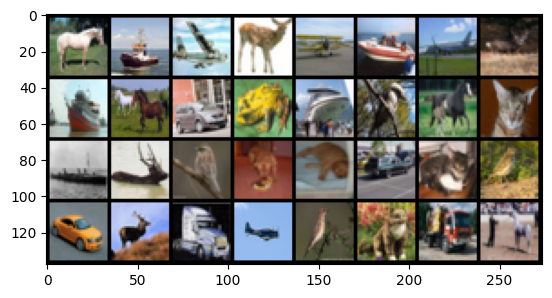

horse  ship   plane  deer   plane  ship   plane  deer  
 ship   horse  car    frog   ship   bird   horse  cat   
 ship   deer   bird   dog    dog    car    cat    bird  
 car    deer   truck  plane  bird   cat    truck  horse 



In [17]:
def imshow(img):
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.show()


# get some random training images
dataiter = iter(trainloader)
images, labels = next(dataiter)

# show images
imshow(torchvision.utils.make_grid(images))
# print labels
# print(' '.join(f'{classes[labels[j]]:5s} ' for j in range(batch_size)))
print(' '.join(f'{classes[labels[j]]:5s} {chr(10) if (j % 8)==7 else ""}' for j in range(batch_size)))

# Basic project network

In [ ]:
device = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')

### Define the Model

In [ ]:
class BaselineModel(nn.Module):

    def __init__(self):
        super(BaselineModel, self).__init__()

        self.conv1 = nn.Conv2d(in_channels=3, out_channels=32, kernel_size=3, padding='same')
        # nn.init.xavier_uniform(self.conv1.weight)
        nn.init.kaiming_uniform_(self.conv1.weight)

        self.conv2 = nn.Conv2d(in_channels=3, out_channels=32, kernel_size=3, padding='same')
        nn.init.kaiming_uniform_(self.conv2.weight)

        self.conv3 = nn.Conv2d(in_channels=32, out_channels=64, kernel_size=3, padding='same')
        nn.init.kaiming_uniform_(self.conv3.weight)
        self.conv4 = nn.Conv2d(in_channels=32, out_channels=64, kernel_size=3, padding='same')
        nn.init.kaiming_uniform_(self.conv4.weight)

        self.conv5 = nn.Conv2d(in_channels=64, out_channels=128, kernel_size=3, padding='same')
        nn.init.kaiming_uniform_(self.conv5.weight)
        self.conv6 = nn.Conv2d(in_channels=64, out_channels=128, kernel_size=3, padding='same')
        nn.init.kaiming_uniform_(self.conv6.weight)

        self.relu = nn.ReLU()

        self.pool1 = nn.MaxPool2d(2, 2)
        self.pool2 = nn.MaxPool2d(2, 2)
        self.pool3 = nn.MaxPool2d(2, 2)

        self.fc1 = nn.Linear(64 * 8 * 8, 128)
        nn.init.kaiming_uniform_(self.fc1.weight)
        self.fc2 = nn.Linear(128, 10)

    def forward(self, x):
        print(x.size())
        x = self.conv1(x)
        print(x.size())
        x = self.relu(x)
        print(x.size())
        x = self.conv2(x)
        x = self.relu(x)
        x = self.pool1(x)

        x = self.conv3(x)
        x = self.relu(x)
        x = self.conv4(x)
        x = self.relu(x)
        x = self.pool2(x)

        x = self.conv5(x)
        x = self.relu(x)
        x = self.conv6(x)
        x = self.relu(x)
        x = self.pool3(x)

        x = x.view(-1, 64 * 8 * 8)

        x = self.fc1(x)
        x = self.relu(x)

        x = self.fc2(x)
        return x

### Train the Model

In [ ]:
baseline_model = BaselineModel()

loss_function = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(baseline_model.parameters(), lr=.001, momentum=.9)

num_epochs = 10

history = {
	"train_loss": [],
	"train_acc": [],
	"val_loss": [],
	"val_acc": []
}

print("Training the network...")
for epoch in range(num_epochs):              
    baseline_model.train()

    train_loss_sum = 0
    train_acc_sum = 0

    val_loss_sum = 0
    val_acc_sum = 0

    for index, (images, labels) in enumerate(trainloader):
        images = images.to(device)
        labels = labels.to(device)

        optimizer.zero_grad()

        prediction = baseline_model(images)
        current_loss = loss_function(prediction, labels)
        current_loss.backward()
        optimizer.step()

        train_loss_sum += current_loss.detach().item()
    
    with nn.no_grad():
        baseline_model.eval()

        for index, (images, labels) in enumerate(valLoader):
            images = images.to(device)
            labels = labels.to(device)

            prediction = baseline_model(images)
            current_loss = loss_function(prediction, labels)

print('Saving the'model...  )

    

In [ ]:
def summarize_diagnostics(history):
    fig, axs = plt.subplots(2, 1)

    axs[0].title('Cross Entropy Loss')
    axs[0].plot(history.history['loss'], color='blue', label='train')
    axs[0].plot(history.history['val_loss'], color='orange', label='test')

    axs[1].title('Classification Accuracy')
    axs[1].plot(history.history['accuracy'], color='blue', label='train')
    axs[1].plot(history.history['val_accuracy'], color='orange', label='test')

    plt.show()
